<a href="https://www.kaggle.com/code/youssef22ashraf/kidney-disease-with-chatgpt3-5-dataset?scriptVersionId=178502350" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataaa/augmented_dataset.csv
/kaggle/input/finaaaal/Untitled spreadsheet (2).xlsx
/kaggle/input/jddbnd/real and ChatGPT 3.5.csv
/kaggle/input/jddbnd/ChatGPT 3.5.csv
/kaggle/input/kidney/kidney_disease.csv
/kaggle/input/ckdisease/kidney_disease.csv
/kaggle/input/chronic-kidney-disease/new_model.csv


In [17]:
import pandas as pd
import numpy as np

# Load the original dataset
original_data = pd.read_csv("/kaggle/input/kidney/kidney_disease.csv")

# Number of new instances to generate
num_new_instances = 5000

# Generate new data instances by sampling from the original dataset
new_instances = original_data.sample(n=num_new_instances, replace=True).reset_index(drop=True)

# Define features with null values and their corresponding new data generation strategies
features_to_fill_manually = {
    'age': lambda: np.random.randint(1, 100),
    'bp': lambda: np.random.randint(50, 180),
    'sg': lambda: round(np.random.uniform(1.005, 1.030), 3),
    'al': lambda: np.random.randint(0, 5),
    'su': lambda: np.random.randint(0, 5),
    'rbc': lambda: np.random.choice(['normal', 'abnormal']),
    'pc': lambda: np.random.choice(['normal', 'abnormal']),
    'pcc': lambda: np.random.choice(['present', 'notpresent']),
    'ba': lambda: np.random.choice(['present', 'notpresent']),
    'bgr': lambda: round(np.random.uniform(70, 490), 1),
    'bu': lambda: round(np.random.uniform(10, 300), 1),
    'sc': lambda: round(np.random.uniform(0.3, 10), 2),
    'sod': lambda: round(np.random.uniform(100, 200), 1),
    'pot': lambda: round(np.random.uniform(2.5, 7), 1),
    'hemo': lambda: round(np.random.uniform(3, 17), 1),
    'pcv': lambda: np.random.randint(15, 55),
    'wc': lambda: np.random.randint(4000, 18000),
    'rc': lambda: round(np.random.uniform(2.5, 7.5), 1),
    'htn': lambda: np.random.choice(['yes', 'no']),
    'dm': lambda: np.random.choice(['yes', 'no']),
    'cad': lambda: np.random.choice(['yes', 'no']),
    'appet': lambda: np.random.choice(['good', 'poor']),
    'pe': lambda: np.random.choice(['yes', 'no']),
    'ane': lambda: np.random.choice(['yes', 'no'])
}

# Fill null values manually for features requiring manual filling
for feature, fill_func in features_to_fill_manually.items():
    if new_instances[feature].isnull().any():
        new_instances[feature] = new_instances[feature].fillna(new_instances.apply(lambda row: fill_func(), axis=1))

# Save the augmented dataset
augmented_data = pd.concat([original_data, new_instances], ignore_index=True)
augmented_data.to_csv("augmented_dataset.csv", index=False)

augmented_data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [20]:
categorical_features = new_instances.select_dtypes(include=['object']).columns
numerical_features = new_instances.select_dtypes(include=[np.number]).columns

for feature in categorical_features:
    if new_instances[feature].isnull().any():
        mode_value = new_instances[feature].mode().iloc[0]
        new_instances[feature].fillna(mode_value, inplace=True)

for feature in numerical_features:
    if new_instances[feature].isnull().any():
        median_value = new_instances[feature].median()
        new_instances[feature].fillna(median_value, inplace=True)
        
augmented_data = pd.concat([original_data, new_instances], ignore_index=True)
augmented_data.to_csv("augmented_dataset.csv", index=False)

In [21]:
augmented_data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [2]:
import pandas as pd


original_data = pd.read_csv("/kaggle/input/kidney/kidney_disease.csv")

# Fill categorical null values with mode

categorical_columns = original_data.select_dtypes(include=['object']).columns
original_data[categorical_columns] = original_data[categorical_columns].fillna(original_data[categorical_columns].mode().iloc[0])

# Fill numerical null values with median
numerical_columns = original_data.select_dtypes(include=['number']).columns
original_data[numerical_columns] = original_data[numerical_columns].fillna(original_data[numerical_columns].median())

original_data


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
print(original_data.isna().sum())
print(original_data.duplicated().sum())

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64
0


In [4]:
# Remove '\t' and '?' characters and convert to numeric
original_data['pcv'] = original_data['pcv'].str.replace('\t', '').str.replace('?', '')
original_data['wc'] = original_data['wc'].str.replace('\t', '').str.replace('?', '')
original_data['rc'] = original_data['rc'].str.replace('\t', '').str.replace('?', '')

original_data['pcv'] = pd.to_numeric(original_data['pcv'], errors='coerce')
original_data['wc'] = pd.to_numeric(original_data['wc'], errors='coerce')
original_data['rc'] = pd.to_numeric(original_data['rc'], errors='coerce')

# Print data types of modified columns
print(original_data[['pcv', 'wc', 'rc']].dtypes)

# Print values of 'rc', 'wc', 'pcv' columns
print(original_data['rc'].values)
print(original_data['wc'].values)
print(original_data['pcv'].values)

pcv    float64
wc     float64
rc     float64
dtype: object
[5.2 5.2 5.2 3.9 4.6 4.4 5.2 5.  4.  3.7 5.2 3.8 3.4 5.2 2.6 2.8 5.2 5.2
 4.3 3.7 3.2 3.6 3.4 5.2 4.6 3.7 4.  4.1 5.2 5.2 5.2 4.  4.  5.2 5.2 4.9
 5.2 2.5 5.2 4.2 4.1 5.2 4.5 3.1 5.2 5.2 4.7 5.2 3.5 3.5 3.8 5.2 3.7 4.7
 4.2 5.2 3.4 5.2 4.3 5.2 5.2 5.2 3.8 5.2 5.2 5.2 5.2 5.2 5.2 6.  5.2 3.2
 5.2 5.2 3.4 5.2 4.  3.7 5.2 5.  3.8 3.7 5.2 5.2 2.1 5.2 5.2 5.  4.7 5.2
 4.2 5.6 3.6 3.2 3.9 5.2 5.2 4.  2.3 4.2 5.2 3.9 5.2 4.2 5.2 5.2 5.2 4.4
 4.2 5.2 4.7 3.9 5.2 5.2 5.2 4.3 5.2 4.4 5.2 5.2 5.2 5.2 5.2 5.2 3.6 5.2
 4.5 4.3 2.9 5.2 2.7 5.2 2.7 8.  3.8 5.2 5.2 5.2 5.2 5.2 5.2 5.2 5.2 5.2
 4.1 3.3 5.2 3.  5.2 5.2 5.2 5.2 5.2 2.9 3.  5.2 5.2 3.9 5.2 4.3 2.4 4.8
 nan 3.2 5.4 5.2 5.2 5.2 5.2 5.2 4.4 3.1 4.9 5.2 4.6 3.4 3.9 5.2 5.2 5.2
 5.2 3.7 5.2 5.2 3.6 5.2 5.2 5.2 5.2 3.4 4.8 3.4 5.2 2.8 5.2 5.2 3.5 3.
 3.9 3.2 3.9 5.2 5.2 5.2 5.2 5.2 5.2 4.6 4.9 5.2 3.9 5.2 3.4 3.7 5.2 5.2
 5.2 4.3 5.2 3.3 5.2 5.2 5.2 4.6 5.2 4.5 3.4 3.8 5.2 3.8 5.2 5.2 5

In [5]:
import pandas as pd
from scipy.stats import mode

# Function to replace NaN with mean in numerical features and mode in categorical features
def replace_nan_with_mean_mode(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            mean_value = round(df[column].mean(),2)
            df[column] = df[column].fillna(mean_value)
        else:
            mode_value = df[column].mode()[0]
            df[column] = df[column].fillna(mode_value)
    return df

# Example usage with a sample DataFrame
# Assuming chatgpt3_5 is already defined
cleaned_real = replace_nan_with_mean_mode(original_data)



# Check the DataFrame
cleaned_real.rc.unique()

cleaned_real.duplicated().sum()


0

In [6]:
cleaned_real['classification'] = cleaned_real['classification'].replace({'ckd\t': 'ckd'})

cleaned_real.classification.nunique


<bound method IndexOpsMixin.nunique of 0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object>

In [8]:
from sklearn.preprocessing import LabelEncoder

ordinal_encoded_real = cleaned_real.copy()

label_encoders = {}
for column in ordinal_encoded_real.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    ordinal_encoded_real[column] = label_encoders[column].fit_transform(ordinal_encoded_real[column])
ordinal_encoded_real
ordinal_encoded_real.to_csv('cleaned_real.csv')

In [ ]:
# Fill categorical null values with mode
categorical_columns = augmented_data.select_dtypes(include=['object']).columns
augmented_data[categorical_columns] = augmented_data[categorical_columns].fillna(augmented_data[categorical_columns].mode().iloc[0])

# Fill numerical null values with median
numerical_columns = augmented_data.select_dtypes(include=['number']).columns
augmented_data[numerical_columns] = augmented_data[numerical_columns].fillna(augmented_data[numerical_columns].median())


In [24]:
augmented_data.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [81]:

# Separate the new data from the filled data
new_data = augmented_data.iloc[402:]

# Save the new data to a separate CSV file
new_data.to_csv("new_data.csv", index=False)

In [82]:
new_data.shape

(541, 26)

In [84]:
import pandas as pd

new_data = pd.read_csv("/kaggle/working/new_data.csv")

# Generate two random rows
# Define the new rows
new_rows = [
    [252, 45, 70, 1.02, 2, 1, 'abnormal', 'abnormal', 'present', 'notpresent', 300, 50, 1.5, 140, 4.0, 12.0, 35, 11000, 3.9, 'yes', 'no', 'no', 'good', 'yes', 'no', 'ckd'],
    [253, 32, 75, 1.025, 0, 0, 'normal', 'normal', 'notpresent', 'notpresent', 120, 30, 0.9, 137, 4.4, 14.5, 42, 9800, 4.2, 'no', 'no', 'no', 'good', 'no', 'no', 'notckd']
]

# Define column names
columns = ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

# Convert new rows to DataFrame
new_rows_df = pd.DataFrame(new_rows, columns=columns)

# Concatenate existing DataFrame with new rows DataFrame
new_data = pd.concat([new_data, new_rows_df], ignore_index=True)



In [85]:
new_data.shape

(543, 26)

In [86]:
new_data.to_csv("new_data.csv", index=False)

In [87]:
# Count duplicate rows
num_duplicate_rows = augmented_data.duplicated().sum()

print("Number of duplicate rows:", num_duplicate_rows)


Number of duplicate rows: 0


In [88]:
# Drop duplicate rows
augmented_data = augmented_data.drop_duplicates()

# Confirm the removal of duplicates
print("Number of rows after dropping duplicates:", len(augmented_data))


# Drop duplicate rows
new_data = new_data.drop_duplicates()

# Confirm the removal of duplicates
print("Number of rows after dropping duplicates:", len(new_data))

Number of rows after dropping duplicates: 943
Number of rows after dropping duplicates: 543


In [89]:
# Save to CSV
augmented_data.to_csv('filled_data.csv', index=False)


In [90]:
data = pd.read_excel("/kaggle/input/finaaaal/Untitled spreadsheet (2).xlsx")
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,52,45,80,1.020,0,0,normal,normal,notpresent,notpresent,...,44,7200,4.2,no,no,no,good,no,no,notckd
1,53,55,90,1.025,2,1,abnormal,abnormal,present,notpresent,...,39,7700,4.5,yes,yes,no,poor,no,no,ckd
2,54,70,100,1.010,3,2,normal,normal,notpresent,notpresent,...,41,7400,3.8,yes,yes,no,poor,yes,yes,ckd
3,55,60,70,1.015,1,0,normal,normal,notpresent,notpresent,...,43,7100,4.0,no,no,no,good,no,no,notckd
4,56,35,85,1.020,1,1,abnormal,abnormal,notpresent,present,...,38,7800,4.3,yes,yes,no,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,496,50,70,1.020,1,0,normal,normal,notpresent,notpresent,...,41,7100,4.0,no,no,no,good,no,no,notckd
394,497,35,85,1.025,2,0,normal,normal,notpresent,notpresent,...,39,7200,4.2,yes,no,no,good,no,no,ckd
395,498,63,90,1.010,0,0,abnormal,normal,notpresent,notpresent,...,46,7000,3.7,no,no,no,good,no,no,notckd
396,499,42,80,1.020,1,1,normal,abnormal,present,present,...,34,7500,4.5,yes,yes,yes,poor,yes,no,ckd


In [60]:
data.shape

Number of rows after dropping rows after index 399: 400


(400, 30)

In [73]:
merged_df = pd.concat([data, augmented_data], ignore_index=True)
merged_df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,52,45.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44,7200,4.2,no,no,no,good,no,no,notckd
1,53,55.0,90.0,1.025,2.0,1.0,abnormal,abnormal,present,notpresent,...,39,7700,4.5,yes,yes,no,poor,no,no,ckd
2,54,70.0,100.0,1.010,3.0,2.0,normal,normal,notpresent,notpresent,...,41,7400,3.8,yes,yes,no,poor,yes,yes,ckd
3,55,60.0,70.0,1.015,1.0,0.0,normal,normal,notpresent,notpresent,...,43,7100,4.0,no,no,no,good,no,no,notckd
4,56,35.0,85.0,1.020,1.0,1.0,abnormal,abnormal,notpresent,present,...,38,7800,4.3,yes,yes,no,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,110,63.0,90.0,1.015,0.0,0.0,abnormal,normal,notpresent,notpresent,...,34,11400,4.7,no,no,no,good,no,no,ckd
1337,82,38.0,70.0,1.011,0.0,1.0,normal,normal,notpresent,notpresent,...,51,7291,5.2,yes,no,no,poor,yes,no,ckd
1338,67,45.0,80.0,1.020,3.0,0.0,normal,abnormal,notpresent,notpresent,...,36,12605,4.2,no,no,no,poor,no,no,ckd
1339,187,3.0,115.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,34,12300,4.4,no,no,no,good,no,no,ckd


In [91]:
merged_df.shape

(1341, 26)

In [76]:
merged_df.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [80]:
merged_df.duplicated().sum()

0

In [92]:
# Save to CSV
merged_df.to_csv('real & ChatGpt 3.5.csv', index=False)


In [94]:
ChatGPT_df = pd.concat([data, new_data], ignore_index=True)
print(len(ChatGPT_df))
print(ChatGPT_df.isna().sum())
print(ChatGPT_df.duplicated().sum())
ChatGPT_df.to_csv('ChatGPT 3.5.csv', index=False)

941
id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64
0


In [27]:
chatgpt3_5= pd.read_csv('/kaggle/input/jddbnd/ChatGPT 3.5.csv')
real_chatgpt3_5= pd.read_csv('/kaggle/input/jddbnd/real and ChatGPT 3.5.csv')
chatgpt3_5

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,52,45.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44,7200,4.2,no,no,no,good,no,no,notckd
1,53,55.0,90.0,1.025,2.0,1.0,abnormal,abnormal,present,notpresent,...,39,7700,4.5,yes,yes,no,poor,no,no,ckd
2,54,70.0,100.0,1.010,3.0,2.0,normal,normal,notpresent,notpresent,...,41,7400,3.8,yes,yes,no,poor,yes,yes,ckd
3,55,60.0,70.0,1.015,1.0,0.0,normal,normal,notpresent,notpresent,...,43,7100,4.0,no,no,no,good,no,no,notckd
4,56,35.0,85.0,1.020,1.0,1.0,abnormal,abnormal,notpresent,present,...,38,7800,4.3,yes,yes,no,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,235,45.0,70.0,1.010,2.0,0.0,abnormal,normal,notpresent,notpresent,...,26,5700,7.2,no,no,yes,good,no,yes,ckd
1646,35,65.0,90.0,1.020,2.0,1.0,abnormal,normal,notpresent,notpresent,...,36,9800,4.9,yes,yes,no,poor,no,yes,ckd
1647,49,60.0,70.0,1.010,2.0,0.0,normal,abnormal,present,notpresent,...,29,21600,3.5,yes,yes,no,poor,no,yes,ckd
1648,252,45.0,70.0,1.020,2.0,1.0,abnormal,abnormal,present,notpresent,...,35,11000,3.9,yes,no,no,good,yes,no,ckd


In [28]:
chatgpt3_5 = chatgpt3_5.drop(columns=['id'])
real_chatgpt3_5 = real_chatgpt3_5.drop(columns=['id'])

print(chatgpt3_5.shape)
print(real_chatgpt3_5.shape)

(1650, 25)
(1853, 25)


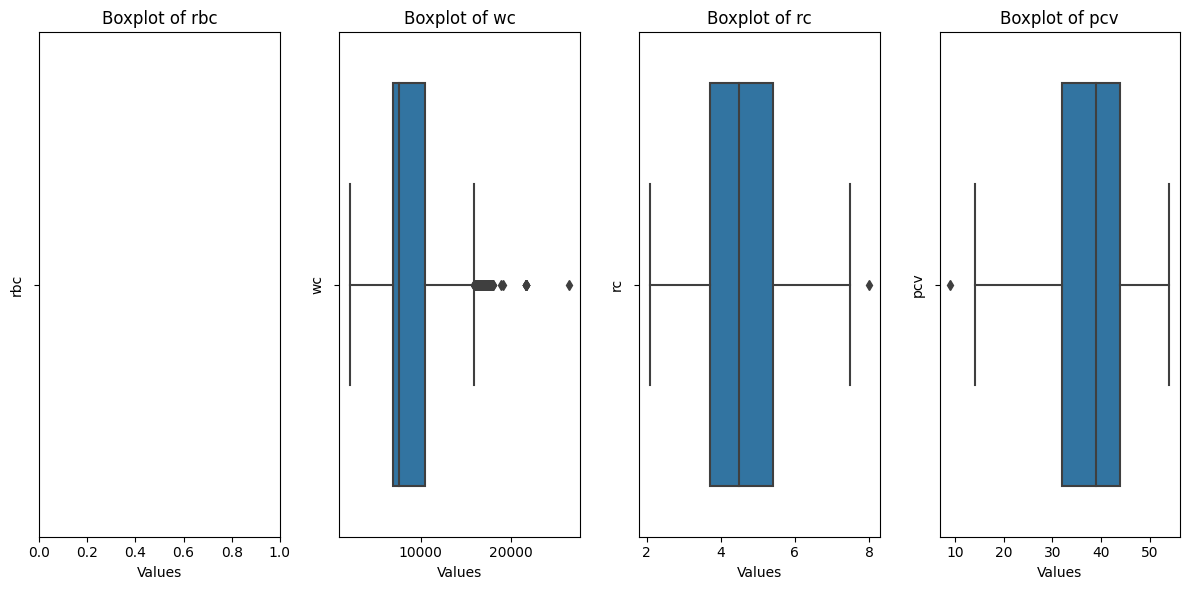

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Convert columns to numeric if they are not already
df=chatgpt3_5.copy()
columns_to_plot = ['rbc', 'wc', 'rc', 'pcv']
for column in columns_to_plot:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Plot the boxplots
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Values')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [30]:
print(chatgpt3_5.isna().sum())
print("---------------------------------")
print(chatgpt3_5.duplicated().sum())
print(chatgpt3_5.shape)

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64
---------------------------------
336
(1650, 25)


In [31]:
chatgpt3_5=chatgpt3_5.drop_duplicates()
chatgpt3_5.shape

(1314, 25)

In [32]:
chatgpt3_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 0 to 1649
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1314 non-null   float64
 1   bp              1314 non-null   float64
 2   sg              1314 non-null   float64
 3   al              1314 non-null   float64
 4   su              1314 non-null   float64
 5   rbc             1314 non-null   object 
 6   pc              1314 non-null   object 
 7   pcc             1314 non-null   object 
 8   ba              1314 non-null   object 
 9   bgr             1314 non-null   float64
 10  bu              1314 non-null   float64
 11  sc              1314 non-null   float64
 12  sod             1314 non-null   float64
 13  pot             1314 non-null   float64
 14  hemo            1314 non-null   float64
 15  pcv             1314 non-null   object 
 16  wc              1314 non-null   object 
 17  rc              1314 non-null   object

In [8]:
chatgpt3_5.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [33]:
chatgpt3_5['pcv'] = chatgpt3_5['pcv'].str.replace('\t', '').str.replace('?', '')
chatgpt3_5['wc'] = chatgpt3_5['wc'].str.replace('\t', '').str.replace('?', '')
chatgpt3_5['rc'] = chatgpt3_5['rc'].str.replace('\t', '').str.replace('?', '')

chatgpt3_5['pcv'] = pd.to_numeric(chatgpt3_5['pcv'], errors='coerce')
chatgpt3_5['wc'] = pd.to_numeric(chatgpt3_5['wc'], errors='coerce')
chatgpt3_5['rc'] = pd.to_numeric(chatgpt3_5['rc'], errors='coerce')

print(chatgpt3_5[['pcv', 'wc', 'rc']].dtypes)


print(chatgpt3_5['rc'].values)
print(chatgpt3_5['wc'].values)
print(chatgpt3_5['pcv'].values)

pcv    float64
wc     float64
rc     float64
dtype: object
[4.2 4.5 3.8 ... 3.5 3.9 4.2]
[ 7200.  7700.  7400. ... 21600. 11000.  9800.]
[44. 39. 41. ... 29. 35. 42.]


In [10]:
import pandas as pd
from scipy.stats import mode

# Function to replace NaN with mean in numerical features and mode in categorical features
def replace_nan_with_mean_mode(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            mean_value = round(df[column].mean(),2)
            df[column] = df[column].fillna(mean_value)
        else:
            mode_value = df[column].mode()[0]
            df[column] = df[column].fillna(mode_value)
    return df

# Example usage with a sample DataFrame
# Assuming chatgpt3_5 is already defined
chatgpt3_5 = replace_nan_with_mean_mode(chatgpt3_5)



# Check the DataFrame
chatgpt3_5.rc.unique()

array([4.2, 4.5, 3.8, 4. , 4.3, 3.6, 4.4, 4.1, 4.8, 3.9, 3.7, 3.5, 5.4,
       6.3, 7.5, 6.2, 7.4, 5.3, 5.1, 4.7, 2.9, 4.9, 5.6, 7.2, 5.5, 5.2,
       2.5, 6.1, 2.8, 7.3, 3. , 4.6, 5.8, 6.4, 2.6, 5. , 6. , 6.5, 7.1,
       3.4, 3.2, 6.8, 5.9, 5.7, 3.1, 6.9, 7. , 3.3, 6.6, 2.3, 2.7, 2.1,
       8. , 2.4, 6.7])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<bound method IndexOpsMixin.nunique of 0       notckd
1          ckd
2          ckd
3       notckd
4          ckd
         ...  
1645       ckd
1646       ckd
1647       ckd
1648       ckd
1649    notckd
Name: classification, Length: 1314, dtype: object>

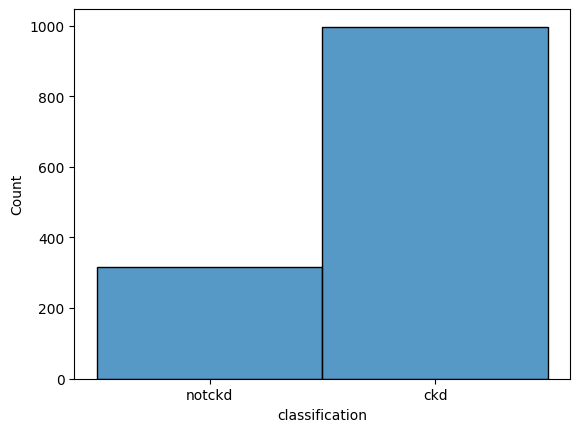

In [34]:
import seaborn as sns
import pandas as pd

# Assuming chatgpt3_5 is your DataFrame
# Replace 'classification' with the actual name of your classification column
chatgpt3_5['classification'] = chatgpt3_5['classification'].replace({'ckd\t': 'ckd'})


sns.histplot(chatgpt3_5.classification)
chatgpt3_5.classification.nunique

In [35]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [36]:
categorical_columns = chatgpt3_5.select_dtypes(include=['object']).columns
one_hot_encoded_chat3_5 = pd.get_dummies(chatgpt3_5, columns=categorical_columns)

one_hot_encoded_chat3_5


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,classification_ckd,classification_notckd
0,45.0,80.0,1.020,0.0,0.0,150.0,50.0,1.0,140.0,4.2,...,True,False,True,False,True,False,True,False,False,True
1,55.0,90.0,1.025,2.0,1.0,200.0,70.0,2.0,138.0,4.5,...,True,False,False,True,True,False,True,False,True,False
2,70.0,100.0,1.010,3.0,2.0,180.0,60.0,1.5,141.0,3.8,...,True,False,False,True,False,True,False,True,True,False
3,60.0,70.0,1.015,1.0,0.0,135.0,45.0,1.2,139.0,4.0,...,True,False,True,False,True,False,True,False,False,True
4,35.0,85.0,1.020,1.0,1.0,220.0,65.0,2.5,137.0,4.3,...,True,False,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,45.0,70.0,1.010,2.0,0.0,113.0,93.0,2.3,167.3,5.2,...,False,True,True,False,True,False,False,True,True,False
1646,65.0,90.0,1.020,2.0,1.0,270.0,39.0,2.0,130.4,2.8,...,True,False,False,True,True,False,False,True,True,False
1647,60.0,70.0,1.010,2.0,0.0,144.0,72.0,3.0,111.1,6.7,...,True,False,False,True,True,False,False,True,True,False
1648,45.0,70.0,1.020,2.0,1.0,300.0,50.0,1.5,140.0,4.0,...,True,False,True,False,False,True,True,False,True,False


In [14]:
from sklearn.preprocessing import LabelEncoder

ordinal_encoded_chat3_5 = chatgpt3_5.copy()

label_encoders = {}
for column in ordinal_encoded_chat3_5.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    ordinal_encoded_chat3_5[column] = label_encoders[column].fit_transform(ordinal_encoded_chat3_5[column])
ordinal_encoded_chat3_5

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,45.0,80.0,1.020,0.0,0.0,1,1,0,0,150.0,...,44.0,7200.0,4.2,0,3,1,0,0,0,1
1,55.0,90.0,1.025,2.0,1.0,0,0,1,0,200.0,...,39.0,7700.0,4.5,1,4,1,1,0,0,0
2,70.0,100.0,1.010,3.0,2.0,1,1,0,0,180.0,...,41.0,7400.0,3.8,1,4,1,1,1,1,0
3,60.0,70.0,1.015,1.0,0.0,1,1,0,0,135.0,...,43.0,7100.0,4.0,0,3,1,0,0,0,1
4,35.0,85.0,1.020,1.0,1.0,0,0,0,1,220.0,...,38.0,7800.0,4.3,1,4,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,45.0,70.0,1.010,2.0,0.0,0,1,0,0,113.0,...,26.0,5700.0,7.2,0,3,2,0,0,1,0
1646,65.0,90.0,1.020,2.0,1.0,0,1,0,0,270.0,...,36.0,9800.0,4.9,1,4,1,1,0,1,0
1647,60.0,70.0,1.010,2.0,0.0,1,0,1,0,144.0,...,29.0,21600.0,3.5,1,4,1,1,0,1,0
1648,45.0,70.0,1.020,2.0,1.0,0,0,1,0,300.0,...,35.0,11000.0,3.9,1,3,1,0,1,0,0


In [37]:
ordinal_encoded_chat3_5.classification.unique()
ordinal_encoded_chat3_5.to_csv("cleaned_chatgpt3_5.csv")


In [47]:
x=ordinal_encoded_chat3_5.iloc[:,:-1].values
y=ordinal_encoded_chat3_5.iloc[:,-1].values
x

array([[ 45.   ,  80.   ,   1.02 , ...,   0.   ,   0.   ,   0.   ],
       [ 55.   ,  90.   ,   1.025, ...,   1.   ,   0.   ,   0.   ],
       [ 70.   , 100.   ,   1.01 , ...,   1.   ,   1.   ,   1.   ],
       ...,
       [ 60.   ,  70.   ,   1.01 , ...,   1.   ,   0.   ,   1.   ],
       [ 45.   ,  70.   ,   1.02 , ...,   0.   ,   1.   ,   0.   ],
       [ 32.   ,  75.   ,   1.025, ...,   0.   ,   0.   ,   0.   ]])

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,accuracy_score, f1_score ,confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 42)

Logistic Regression Model Accuracy: 0.8995433789954338
Logistic Regression Precision: 0.9
Logistic Regression Recall: 0.6982758620689655
Logistic Regression F1 Score: 0.7864077669902912


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


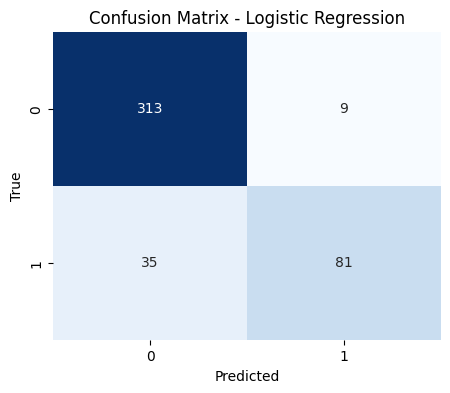

In [41]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
print("Logistic Regression Model Accuracy:", accuracy_logreg)
print("Logistic Regression Precision:", precision_logreg)
print("Logistic Regression Recall:", recall_logreg)
print("Logistic Regression F1 Score:", f1_logreg)

logreg_cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(5, 4))
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def knn_accuracy(range_start, range_end, X_train, X_test, y_train, y_test):
    max_accuracy = 0
    best_n_neighbors = 0
    best_cm = None
    best_precision = 0
    best_recall = 0
    best_f1 = 0

    for i in range(range_start, range_end + 1):
        if i % 2 != 0:
            knn_model = KNeighborsClassifier(n_neighbors=i)
            knn_model.fit(X_train, y_train)
            y_pred_knn = knn_model.predict(X_test)
            accuracy_knn = accuracy_score(y_test, y_pred_knn)
            precision_knn = precision_score(y_test, y_pred_knn, average='macro', zero_division=0)
            recall_knn = recall_score(y_test, y_pred_knn, average='macro', zero_division=0)
            f1_knn = f1_score(y_test, y_pred_knn, average='macro', zero_division=0)
            if accuracy_knn > max_accuracy:
                max_accuracy = accuracy_knn
                best_n_neighbors = i
                best_cm = confusion_matrix(y_test, y_pred_knn)
                best_precision = precision_knn
                best_recall = recall_knn
                best_f1 = f1_knn

    print(f"Maximum Accuracy: {max_accuracy}, Best Number of Neighbors: {best_n_neighbors}")
    print(f"Precision: {best_precision} \nRecall: {best_recall} \nF1 Score: {best_f1}")

    plt.figure(figsize=(5, 4))
    sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix - k-NN')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return max_accuracy, best_n_neighbors


Maximum Accuracy: 0.8721461187214612, Best Number of Neighbors: 3
Precision: 0.8486494597839136 
Recall: 0.8110141357892482 
F1 Score: 0.8268628059971201


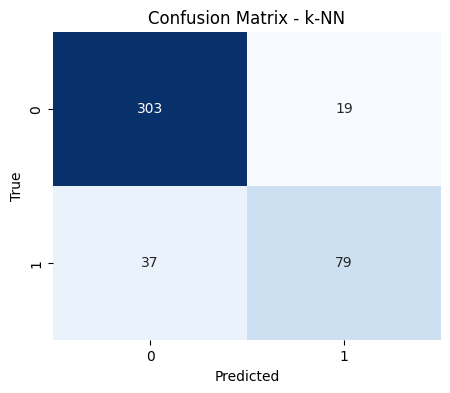

In [43]:
max_accuracy, best_n_neighbors = knn_accuracy(3, 266, X_train, X_test, y_train, y_test)

Decision Tree Model Accuracy: 0.9771689497716894
Decision Tree Precision: 0.9818181818181818
Decision Tree Recall: 0.9310344827586207
Decision Tree F1 Score: 0.9557522123893805


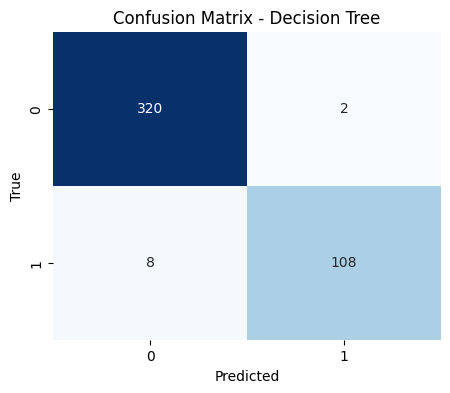

In [28]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print("Decision Tree Model Accuracy:", accuracy_dt)
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree F1 Score:", f1_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SVM Model Accuracy: 0.9817351598173516
SVM Precision: 0.9817401622385235
SVM Recall: 0.9817351598173516
SVM F1 Score: 0.9816313148845394


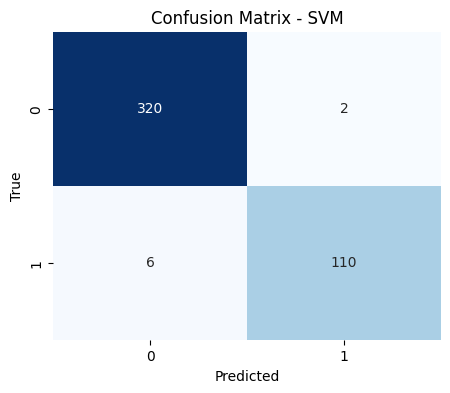

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# Convert X_train to DataFrame
X_train = pd.DataFrame(X_train)

# Now you can use x_train_df as a DataFrame with all columns from X_train

# Define the column transformer
# Here we assume all features are numeric. Adjust if you have categorical features.
numeric_features = X_train.columns  # Assuming x_train is a DataFrame
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

column_transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

# Fit and transform the training data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Convert X_train_transformed back to DataFrame to access columns
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=numeric_features)

# Train the SVM classifier
clf = SVC(kernel='rbf', gamma=0.01, C=1000, random_state=42)
clf.fit(X_train_transformed, y_train)

# Making predictions
y_pred_svm = clf.predict(X_test_transformed)

# Calculating accuracy, precision, recall, and F1 score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted', zero_division=0)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)

# Printing the results
print("SVM Model Accuracy:", accuracy_svm)
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)
print("SVM F1 Score:", f1_svm)

# Plotting the confusion matrix
svm_cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Random Forest Model Accuracy: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1 Score: 1.0


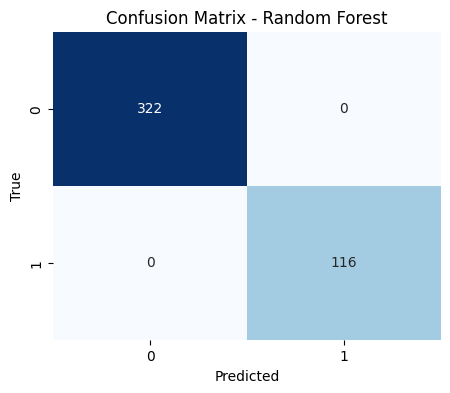

In [32]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print("Random Forest Model Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

MLP Model Accuracy: 0.8059360730593608
MLP Precision: 0.8297872340425532
MLP Recall: 0.33620689655172414
MLP F1 Score: 0.47852760736196315


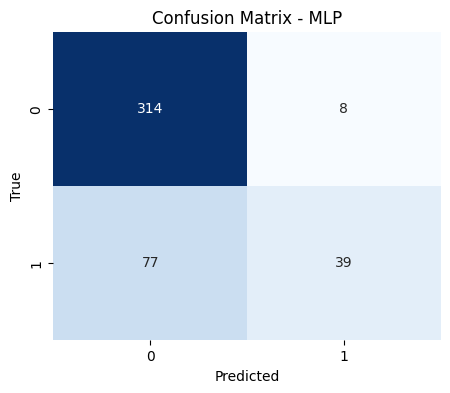

In [33]:
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
print("MLP Model Accuracy:", accuracy_mlp)
print("MLP Precision:", precision_mlp)
print("MLP Recall:", recall_mlp)
print("MLP F1 Score:", f1_mlp)
mlp_cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(5, 4))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - MLP')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

2024-05-17 15:22:45.819755: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 15:22:45.819887: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 15:22:45.957582: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/3


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5633 - loss: 91.0894 - val_accuracy: 0.8580 - val_loss: 7.0953
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7078 - loss: 10.4465 - val_accuracy: 0.8011 - val_loss: 1.1745
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6068 - loss: 5.5059 - val_accuracy: 0.8580 - val_loss: 1.9304
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7202 - loss: 4.2980 
MLP Model Accuracy: 0.7351598143577576


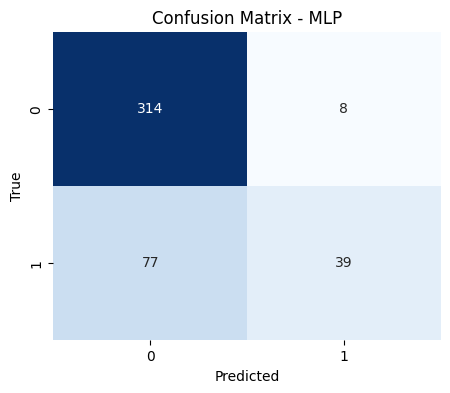

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
def create_mlp_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model
mlp_model = create_mlp_model(input_dim=X_train.shape[1])
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)
loss, accuracy = mlp_model.evaluate(X_test, y_test)
print("MLP Model Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - MLP')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

XGBoost Model Accuracy: 1.0
XGBoost Precision: 1.0
XGBoost Recall: 1.0
XGBoost F1 Score: 1.0


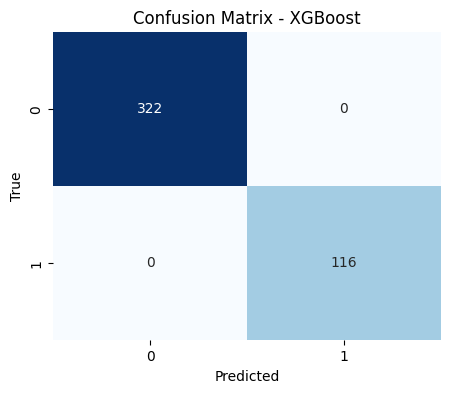

In [35]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print("XGBoost Model Accuracy:", accuracy_xgb)
print("XGBoost Precision:", precision_xgb)
print("XGBoost Recall:", recall_xgb)
print("XGBoost F1 Score:", f1_xgb)
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()